In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv(r'/kaggle/input/cards-image-datasetclassification/cards.csv')
df.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


In [3]:
df['card type'].nunique()

14

In [4]:
df['class index'].nunique()

53

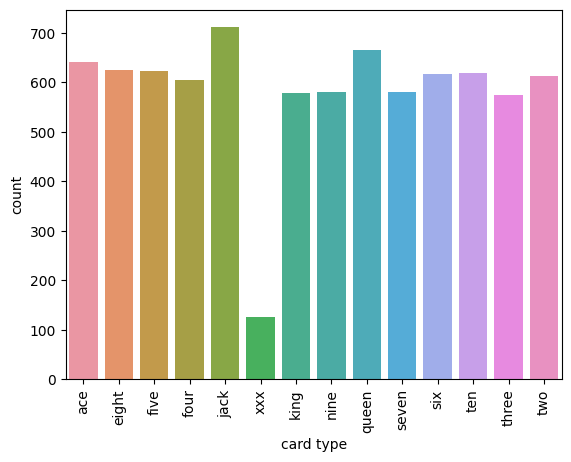

In [5]:
sns.countplot(x=df['card type'])
plt.xticks(rotation = 90)
plt.show()

There are 13 cards from 2 to Ace and the Joker

In [6]:
df['labels'].nunique()

53

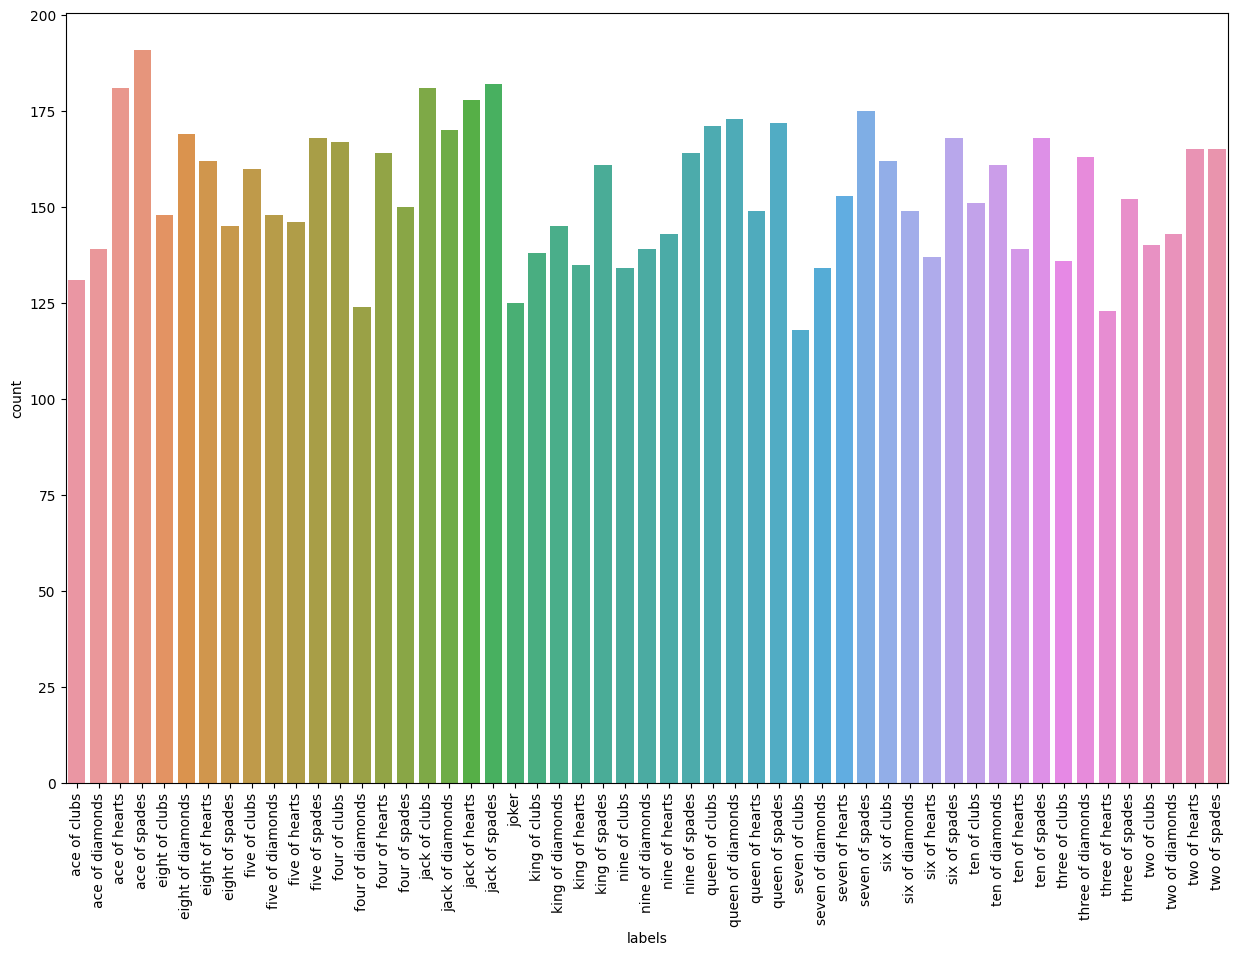

In [7]:
plt.figure(figsize = (15,10))
sns.countplot(x=df['labels'])
plt.xticks(rotation = 90)
plt.show()

# Dataset and Dataloader

### Dataset creation

In [8]:
class CardDataset(Dataset):
    def __init__(self, data_dir, transform = None):
        self.data = ImageFolder(data_dir, transform = transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [9]:
train_dataset = CardDataset(r'/kaggle/input/cards-image-datasetclassification/train/')
valid_dataset = CardDataset(r'/kaggle/input/cards-image-datasetclassification/valid/')
test_dataset = CardDataset(r'/kaggle/input/cards-image-datasetclassification/test/')

In [10]:
print('Train dataset -->', len(train_dataset), 'Validation dataset -->', len(valid_dataset), 'Test datset -->', len(test_dataset),sep='\n')

Train dataset -->
7624
Validation dataset -->
265
Test datset -->
265


Train dataset

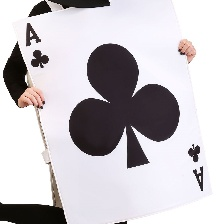

In [11]:
image, label = train_dataset[0]
image

In [12]:
label

0

Validation dataset

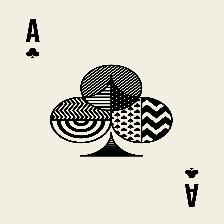

In [13]:
image, label = valid_dataset[0]
image

In [14]:
label

0

Classes present in the train dataset

In [15]:
print(train_dataset.classes)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


#### Transforming the images to a dimension of 128x128 as the pretrained efficient net model takes input in this format. Also converting the images to tensor.

In [16]:
#applying transformation to datasets
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_dataset = CardDataset(r'/kaggle/input/cards-image-datasetclassification/train/', transform)
valid_dataset = CardDataset(r'/kaggle/input/cards-image-datasetclassification/valid/', transform)
test_dataset = CardDataset(r'/kaggle/input/cards-image-datasetclassification/test/', transform)

In [17]:
image, label = train_dataset[0]
print(image, label, sep = '\n')

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0784, 0.0824, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
         [0.7490, 0.7451, 0.7412,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0745, 0.0784, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
         [0.7451, 0.7451, 0.7373,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [18]:
image.shape

torch.Size([3, 128, 128])

### Dataloader creation

In [19]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle =True)
valid_dataloader = DataLoader(valid_dataset, batch_size = 32, shuffle =False)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle =False)

In [20]:
len(train_dataloader)

239

In [21]:
for image,label in train_dataloader:
    print(image.shape, label.shape, sep ='\n')
    break

torch.Size([32, 3, 128, 128])
torch.Size([32])


In [22]:
label

tensor([ 7,  7,  9, 31, 27,  6, 42, 41, 30, 34, 31, 26,  2, 26, 50, 39, 24, 46,
        48, 35, 11, 17, 32, 30, 35, 24, 21, 35,  9,  6,  0,  4])

# Pytorch model

**The pretrained efficientnet_b0 model is used here. As the classes in our dataset are 53, a fine tuning appraoch was taken and the last linear layer that had 1000 neurons as output was replaced with a linear layer of 53 neurons output. The last convolution layer in the efficientnet model with 1280 neurons as output is directly connected to the last linear layer with 53 neurons output**

In [23]:
class CardClassifier(nn.Module):
    def __init__(self, num_classes = 53):
        super(CardClassifier,self).__init__()
        self.initial_model = timm.create_model('efficientnet_b0', pretrained = True)
        self.base_model = nn.Sequential(*list(self.initial_model.children())[:-1])
        
        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Linear(enet_out_size, num_classes),
        )
        
    def forward(self,x):
        x = self.base_model(x)
        output = self.classifier(x)
        return output
    

In [24]:
model = CardClassifier()
output = model(image)
output.shape

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

torch.Size([32, 53])

In [25]:
output

tensor([[ 0.0449,  0.1511,  0.0799,  ..., -0.2912,  0.3095, -0.1172],
        [-0.1403,  0.3791, -0.1940,  ...,  0.0270,  0.4664,  0.7264],
        [-0.2159, -0.2005,  0.1577,  ...,  0.0014,  0.0492,  0.1194],
        ...,
        [ 0.4469,  0.2494, -0.1066,  ..., -0.2979, -0.3166, -0.2197],
        [-0.0447, -0.0140, -0.0263,  ..., -0.1998, -0.1944, -0.0333],
        [ 0.2313,  0.3461, -0.6039,  ..., -0.0099, -0.2437,  0.3462]],
       grad_fn=<AddmmBackward0>)

### Loss function and optimizer

**Cross entropy loss and Adam optimizer is used for calculating loss and correcting the parametrs of the model during training**

In [26]:
#Loss function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [27]:
loss = criterion(output, label)
loss.item()

4.008617401123047

# Training Loop

In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### Combining everything and training the model

#### Preparing the data

In [29]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_folder = r'/kaggle/input/cards-image-datasetclassification/train/'
valid_folder = r'/kaggle/input/cards-image-datasetclassification/valid/'
test_folder = r'/kaggle/input/cards-image-datasetclassification/test/'

train_dataset = CardDataset(train_folder, transform)
valid_dataset = CardDataset(valid_folder, transform)
test_dataset = CardDataset(test_folder, transform)

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle =True)
valid_dataloader = DataLoader(valid_dataset, batch_size = 32, shuffle =False)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle =False)

#### Training the model

In [30]:
num_epochs = 15
train_losses, val_losses = [], []

clf_model = CardClassifier(num_classes = 53)
clf_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf_model.parameters(), lr = 0.001)


for epoch in tqdm(range(num_epochs), desc = 'Epoch'):
    clf_model.train()
    running_loss = 0.0
    for images,labels in tqdm(train_dataloader, desc = "Training"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = clf_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*labels.size(0)
    train_loss = running_loss/len(train_dataloader.dataset)
    train_losses.append(train_loss)
    
    clf_model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images,labels in tqdm(valid_dataloader, desc = "Validating"):
            images, labels = images.to(device), labels.to(device)
            outputs = clf_model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()*labels.size(0)
    val_loss = running_loss/len(valid_dataloader.dataset)
    val_losses.append(val_loss)
    
    print(f'Epoch: {epoch+1}/{num_epochs}, training loss: {train_loss}, validation loss: {val_loss}')

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 1/15, training loss: 1.5754572114314012, validation loss: 0.4555068897751142


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 2/15, training loss: 0.5777551701286532, validation loss: 0.18865514701267458


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 3/15, training loss: 0.35761218978500564, validation loss: 0.1452843056534821


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 4/15, training loss: 0.2364130058059037, validation loss: 0.1012110709581735


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 5/15, training loss: 0.18464389774881906, validation loss: 0.11098117266061171


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 6/15, training loss: 0.16695561445663132, validation loss: 0.08804645588937796


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 7/15, training loss: 0.1481957910396745, validation loss: 0.13939901837762797


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 8/15, training loss: 0.10877937313798593, validation loss: 0.16562904186968533


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 9/15, training loss: 0.10685595906762736, validation loss: 0.14014963260236776


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 10/15, training loss: 0.12079724310022649, validation loss: 0.11112036891984489


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 11/15, training loss: 0.09151883843840576, validation loss: 0.08695557705073986


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 12/15, training loss: 0.09635334619753852, validation loss: 0.0780054601858247


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 13/15, training loss: 0.10916986220573922, validation loss: 0.12813766396270607


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 14/15, training loss: 0.08290906496402678, validation loss: 0.1529870001774914


Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validating:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 15/15, training loss: 0.06467323261019964, validation loss: 0.10962972174275597


### Losses in the model

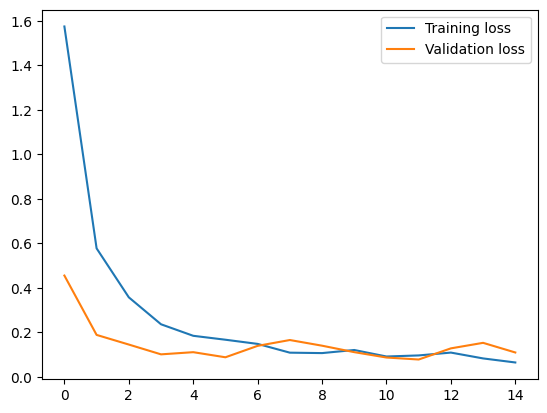

In [31]:
plt.plot(train_losses, label = "Training loss")
plt.plot(val_losses, label = "Validation loss")
plt.legend()
plt.show()

# Result evaluation

In [32]:
def test_image(image, device):
    to_pil = transforms.ToPILImage()
    pil_image = to_pil(image)
    with torch.no_grad():
        clf_model.eval()
        image = image.unsqueeze(0)
        image = image.to(device)
        output = clf_model(image)
        probabilities = nn.functional.softmax(output,dim=1)
    return pil_image, probabilities.squeeze(0).cpu()

def visualization(image, probabilities):
    fig, ax = plt.subplots(1,2, figsize =(10,10))
    ax[0].imshow(image)
    ax[0].axis("off")
    ax[1].barh(test_dataset.classes, probabilities)
    ax[1].set_xlabel("Probability")
    ax[1].set_xlim(0,1)
    plt.tight_layout()
    plt.show()

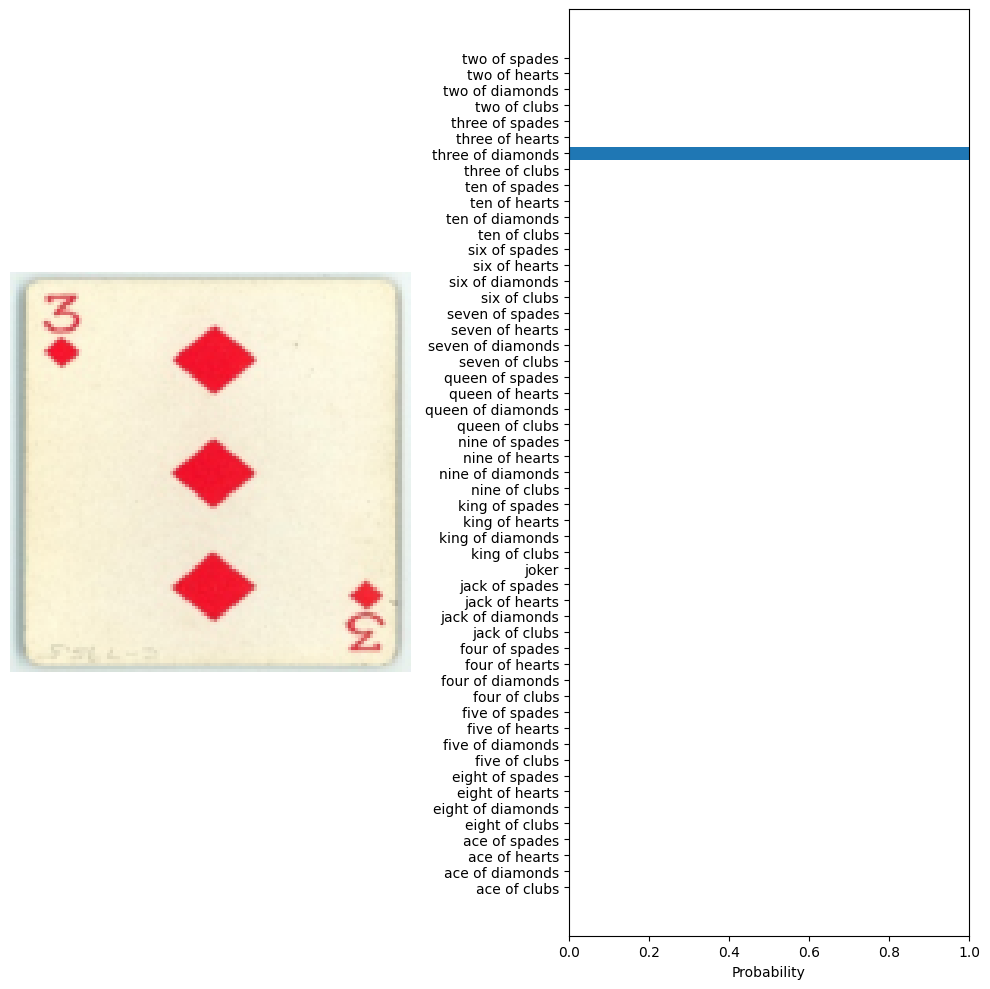

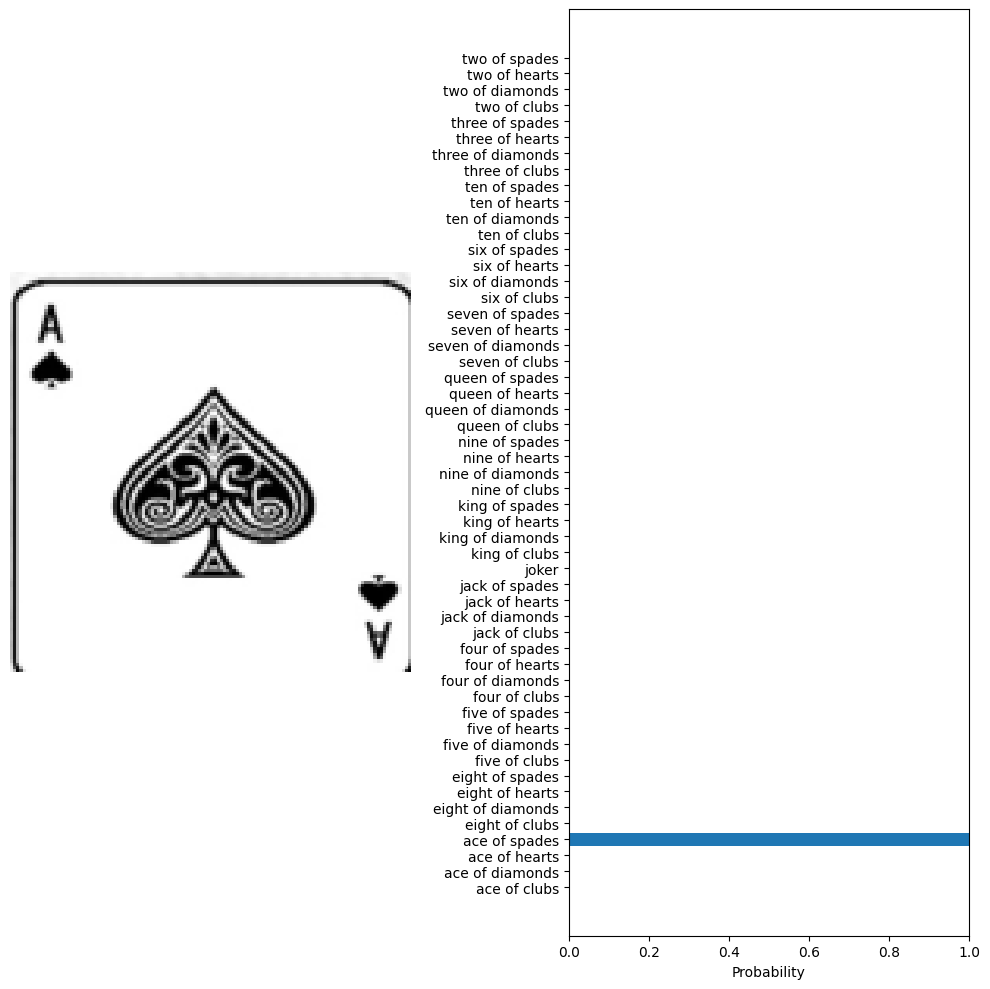

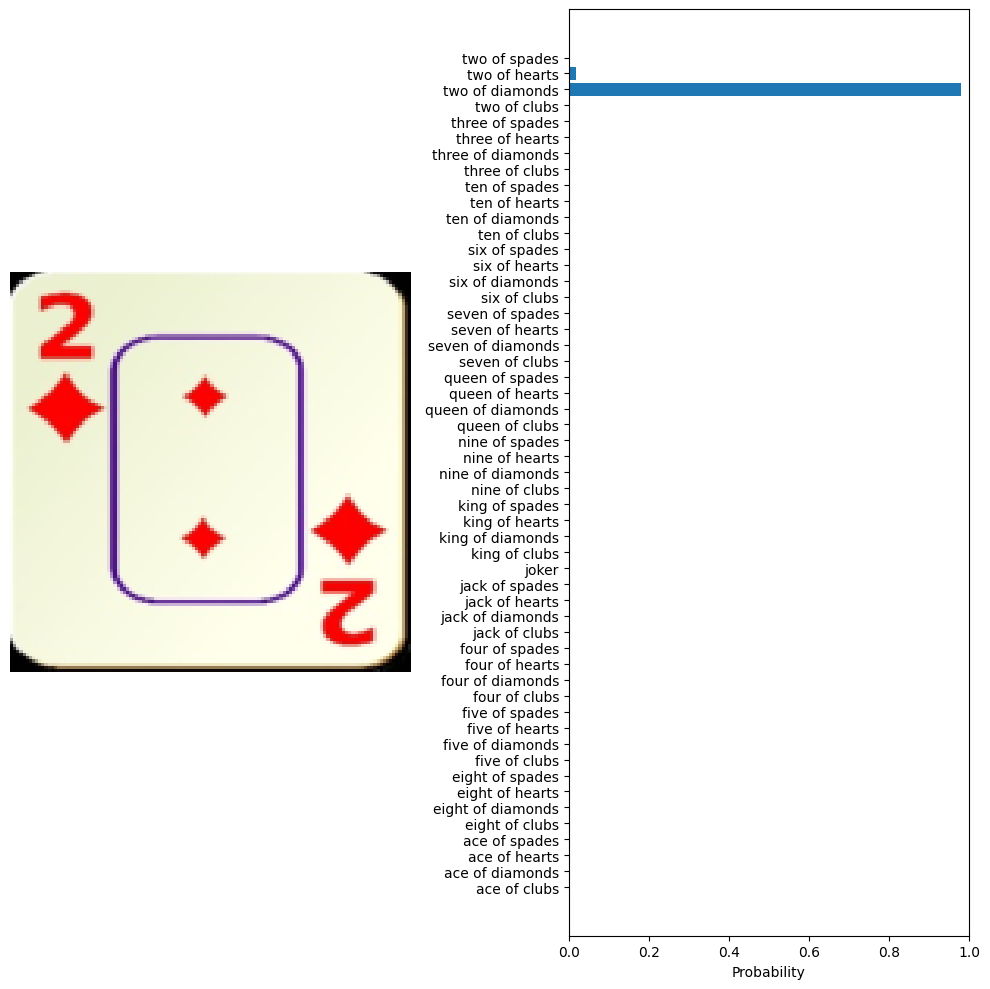

In [33]:
import random
index = random.sample(range(len(test_dataset)),3)
for i in index:
    image,_ = test_dataset[i]
    img, prob = test_image(image, device)
    visualization(img,prob)

The model is performing adequately. Argmax can be used to get the class prediction of an image 

# Batch prediction and Accuracy

In [34]:
def predict(model, image_set, device):
    model.eval()
    with torch.no_grad():
        image_set = image_set.to(device)
        outputs = model(image_set)
        predictions = torch.argmax(outputs, dim = 1)
    return predictions    

In [35]:
prediction = []

for images, labels in tqdm(test_dataloader, desc = 'Test'):
    pred = predict(clf_model, images, device)
    prediction.append(pred.tolist())

prediction = torch.tensor([i for pred_batch in prediction for i in pred_batch])
actual = torch.tensor([label for _,label in test_dataset])
correct_prediction = (prediction == actual).sum().item()
accuracy = correct_prediction/actual.size(0)
print(f'Accuracy of the model --> {accuracy*100}%')

Test:   0%|          | 0/9 [00:00<?, ?it/s]

Accuracy of the model --> 93.9622641509434%
